### snMetric
Build a supernova model and fit from a txt file, then write a new metric to evaluate LSST's performance to detect that light curve

In [4]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)

### build a sn light curve model

In [9]:
from ipywidgets import interactive

# SN model
def snModel(t, tsh, Esh,t0):
    # use np.piecewise(x,condition list, function)

    condlist = [t < tsh, t >=tsh]
    func = [lambda t:Esh/tsh*(1-np.exp(-t/t0)), lambda t:Esh/tsh*np.exp(-t/t0)*(np.exp(tsh/t0)-1)]
    return np.piecewise(t, condlist, func)

def snLcplot(tsh,Esh,t0):
    t = np.arange(0,20,0.1)
    mags = snModel(t,tsh=tsh,Esh=Esh,t0=t0)
    plt.plot(t,mags)

interactive_plot = interactive(snLcplot, tsh=(0,18),Esh=(0,10),t0=(0.1,20))
interactive_plot


interactive(children=(IntSlider(value=9, description='tsh', max=18), IntSlider(value=5, description='Esh', max…

In [7]:
snModel(np.arange(0,10,0.1),tsh=5,Esh=1,t0=0.2)

array([  0.00000000e+00,   7.86938681e-02,   1.26424112e-01,
         1.55373968e-01,   1.72932943e-01,   1.83583000e-01,
         1.90042586e-01,   1.93960523e-01,   1.96336872e-01,
         1.97778201e-01,   1.98652411e-01,   1.99182646e-01,
         1.99504250e-01,   1.99699312e-01,   1.99817624e-01,
         1.99889383e-01,   1.99932907e-01,   1.99959306e-01,
         1.99975318e-01,   1.99985030e-01,   1.99990920e-01,
         1.99994493e-01,   1.99996660e-01,   1.99997974e-01,
         1.99998771e-01,   1.99999255e-01,   1.99999548e-01,
         1.99999726e-01,   1.99999834e-01,   1.99999899e-01,
         1.99999939e-01,   1.99999963e-01,   1.99999977e-01,
         1.99999986e-01,   1.99999992e-01,   1.99999995e-01,
         1.99999997e-01,   1.99999998e-01,   1.99999999e-01,
         1.99999999e-01,   2.00000000e-01,   2.00000000e-01,
         2.00000000e-01,   2.00000000e-01,   2.00000000e-01,
         2.00000000e-01,   2.00000000e-01,   2.00000000e-01,
         2.00000000e-01,

### Fit the sn model from txt file

In [31]:
# load light curve data
lc = np.genfromtxt('lc.txt',dtype=[('phase','f8'),('mag','f8'),('filter','S1')],delimiter=',')

# decode byte to string
lcfilter=[]
for f in lc['filter']:
    lcfilter.append(f.decode('UTF-8'))
lcfilter = np.array(lcfilter) 

# lc for a filter 'r'
fmatch = np.where(lcfilter=='r')
lcmagr = lc['mag'][fmatch]
phaser = lc['phase'][fmatch]



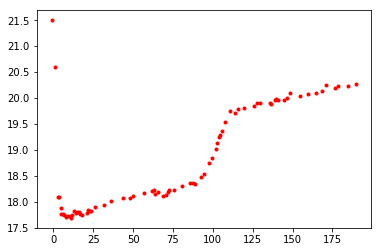

In [44]:
plt.plot(phaser,lcmagr,'r.')

In [55]:
def mag2flux(m, m0):
    return 10**(-0.4*(m-m0))
def flux2mag(fx, m0):
    return -2.5*np.log10(fx)+m0

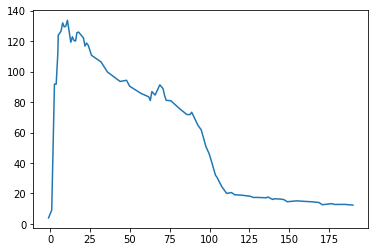

In [50]:
fluxr = mag2flux(lcmagr,23)

plt.plot(phaser,fluxr)

In [57]:
lcmagr

array([ 21.5  ,  20.6  ,  18.093,  18.094,  17.874,  17.767,  17.759,
        17.744,  17.699,  17.721,  17.717,  17.685,  17.741,  17.809,
        17.777,  17.798,  17.802,  17.753,  17.75 ,  17.783,  17.832,
        17.814,  17.827,  17.89 ,  17.934,  18.003,  18.073,  18.064,
        18.11 ,  18.167,  18.197,  18.229,  18.153,  18.182,  18.099,
        18.129,  18.187,  18.227,  18.231,  18.298,  18.36 ,  18.36 ,
        18.337,  18.474,  18.523,  18.738,  18.842,  19.018,  19.128,
        19.241,  19.289,  19.37 ,  19.529,  19.744,  19.715,  19.794,
        19.806,  19.851,  19.901,  19.896,  19.912,  19.88 ,  19.956,
        19.983,  19.952,  19.968,  19.993,  20.089,  20.047,  20.073,
        20.096,  20.129,  20.247,  20.186,  20.231,  20.227,  20.267])

In [58]:
flux2mag(fluxr,23)

array([ 21.5  ,  20.6  ,  18.093,  18.094,  17.874,  17.767,  17.759,
        17.744,  17.699,  17.721,  17.717,  17.685,  17.741,  17.809,
        17.777,  17.798,  17.802,  17.753,  17.75 ,  17.783,  17.832,
        17.814,  17.827,  17.89 ,  17.934,  18.003,  18.073,  18.064,
        18.11 ,  18.167,  18.197,  18.229,  18.153,  18.182,  18.099,
        18.129,  18.187,  18.227,  18.231,  18.298,  18.36 ,  18.36 ,
        18.337,  18.474,  18.523,  18.738,  18.842,  19.018,  19.128,
        19.241,  19.289,  19.37 ,  19.529,  19.744,  19.715,  19.794,
        19.806,  19.851,  19.901,  19.896,  19.912,  19.88 ,  19.956,
        19.983,  19.952,  19.968,  19.993,  20.089,  20.047,  20.073,
        20.096,  20.129,  20.247,  20.186,  20.231,  20.227,  20.267])

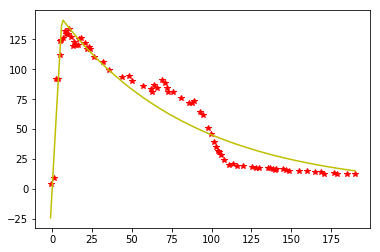

In [48]:
from scipy.optimize import curve_fit

xdat = phaser
ydat = fluxr
popt,pcov = curve_fit(snModel, xdat, ydat)

yfit = snModel(xdat,*popt)
plt.plot(xdat, ydat, 'r*', xdat, yfit,'y-')

In [59]:
popt

array([  6.12661438e+00,   1.20948292e+04,   8.19125619e+01])

### define a new metric to evaluate the performance of lsst

In [5]:
class snMetric(metrics.BaseMetric):
    """
    evaluate the detectability of supernova
    """
    def __init__(self, colname='fiveSigmaDepth', timeCol='observationStartMJD', 
                 filterCol='filter', transDuration=10, threSNR=1, nDetect=0,**kwargs):
        self.colname = colname
        self.timeCol = timeCol
        self.filterCol = filterCol
        self.tsh = 6.1266
        self.Esh = 1.2095*10**4
        self.t0 = 81.91256 
        self.transDuration = transDuration
        self.threSNR = threSNR
        self.nDetect = nDetect
        
        super().__init__(col=[self.colname, self.timeCol, self.filterCol],**kwargs)
        
        
    def run(self, dataSlice, slicePoint=None):
        
        dataSlice.sort(order=self.timeCol)
        time = (dataSlice[self.timeCol] - dataSlice[self.timeCol].min())/365.25
        magsData = dataSlice[self.colname]
        filters = dataSlice[self.filterCol]
        
        step = int(self.transDuration)
        
        nTotal = int(np.floor((time.max()/step)))
        
        if nTotal!=0:
            lcDetect = np.ones(nTotal,dtype=bool) 
            for i,ri in enumerate(np.arange(0,len(time)-step,step)):
                print(i,nTotal)
                lci = np.arange(ri,ri+step)
                lctime = time[lci]-time[lci].min()

                #fluxModel = self.snModel(lctime,self.tsh,self.Esh,self.t0)
                magsModel = self.snModel(lctime,self.tsh,self.Esh,self.t0)

                lcSNR = self.m52snr(magsModel, magsData[lci])

                if len(lcSNR[np.where(lcSNR>=self.threSNR)])<=self.nDetect:
                    lcDetect[i] = False
                
            nDetect = len(lcDetect[np.where(lcDetect==True)])    
        
        if nTotal==0:
            result = 0
        else:
            result = nDetect/nTotal
        
        return float(result)

    def m52snr(self,m,m5):
        # fiveSigmaDepth
        snr = 5.*10.**(-0.4*(m-m5))
        return snr
    
    def snModel(self, t, tsh, Esh,t0):
        # use np.piecewise(x,condition list, function)
        condlist = [t < tsh, t >=tsh]
        func = [lambda t:Esh/tsh*(1-np.exp(-t/t0)), lambda t:Esh/tsh*np.exp(-t/t0)*(np.exp(tsh/t0)-1)]
        
        flux = np.piecewise(t, condlist, func) 
        magModel = -2.5*np.log10(flux)+23
        return magModel
    
    def m52snr(self,m,m5):
        # fiveSigmaDepth
        snr = 5.*10.**(-0.4*(m-m5))
        return snr

  

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night<900 for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 112526 visits
Running:  ['snSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<900" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/plots/spatialPlotters.py:302: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn('Histogram range was single-valued; expanding default range.')
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/rotator.py:475: RuntimeWarning: invalid value encountered in double_scalars
  ang[0, :] =

monopole: 0  dipole: lon: 0, lat: nan, amp: 0
Plotting complete.


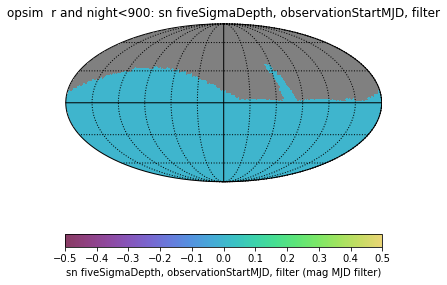

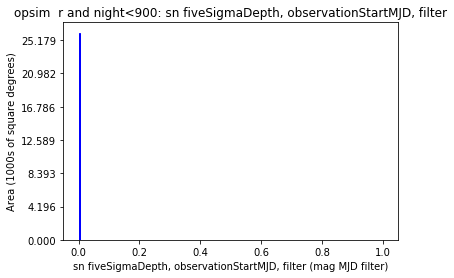

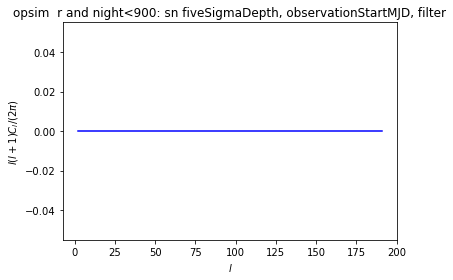

In [8]:
# Run the metric 
# metric, slicer, constraint
metric = snMetric(colname='fiveSigmaDepth', timeCol='observationStartMJD', 
                 filterCol='filter', transDuration=200, threSNR=1, nDetect=0)
slicer = slicers.HealpixSlicer(nside = 64)
sqlconstraint = 'filter = "r" and night<900'

# bundle
snSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'snSky':snSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)